# Amazing Mazes

Générateur et solveur de labyrinthe parfait inspiré par la mythologie grecque. Met en œuvre le Retour sur trace (Recursive Backtracking) et Kruskal pour la génération, le Retour sur trace et A* pour la résolution. Comprend la visualisation ASCII/image, l'analyse de performance et des tests sur des labyrinthes jusqu'à 100 000 cellules. Projet algorithmique Python avec benchmarks comparatifs.

In [209]:
# Imports
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# tests statistiques
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Les constructeurs

## Recursive Backtracking

#### Fonctionnement du générateur de labyrinthe par DFS récursif

Votre code implémente l'algorithme **Recursive Backtracking**, qui est une application directe du **DFS (Depth-First Search)** pour générer des labyrinthes parfaits.

##### Principe DFS appliqué :

1. **Initialisation** : Une grille entièrement murée où seules les cellules aux coordonnées impaires peuvent devenir des passages

2. **Exploration en profondeur** :
   - Commence à la position (1,1) 
   - Marque la cellule courante comme visitée
   - Explore récursivement chaque voisin non-visité en choisissant aléatoirement l'ordre

3. **Mécanisme de backtracking** :
   - Quand une cellule n'a plus de voisins non-visités, l'algorithme "remonte" dans la pile d'appels récursifs
   - Cela correspond au backtracking naturel du DFS

4. **Création des passages** :
   - Lors de chaque déplacement vers un voisin, le mur intermédiaire est supprimé
   - Cela crée un chemin continu dans le labyrinthe

#### Caractéristiques DFS :

- **Parcours exhaustif** : Toutes les cellules sont visitées exactement une fois
- **Structure d'arbre** : Le résultat forme un arbre couvrant, garantissant un chemin unique entre deux points
- **Complexité** : O(n²) en temps et espace pour une grille n×n

#### Le Problème de Récursion avec les Grands Labyrinthes

**Le Phénomène**
À partir des labyrinthes de taille 45×45, l'algorithme DFS récursif plante systématiquement avec une erreur "stack overflow". Ce problème est particulièrement visible avec certaines seeds comme la seed 66.

**Le Mécanisme de la Pile d'Appels**
Chaque appel récursif empile un nouveau contexte d'exécution en mémoire. Pour les petits labyrinthes, le nombre d'appels reste gérable. Pour les grands labyrinthes, le nombre d'appels dépasse la capacité de la pile.

**La Limite Python**
Python impose une limite de sécurité d'environ 1000 appels récursifs empilés. Au-delà de cette limite, le programme s'interrompt pour préserver la stabilité du système.

**Pourquoi 45×45 est la Taille Critique**
Un labyrinthe de 45×45 contient 2025 cellules à visiter. Dans le scénario le plus défavorable, l'algorithme peut nécessiter jusqu'à 2025 appels récursifs successifs, ce qui dépasse largement la limite autorisée de 1000 appels.

**Impact de la Seed**
La seed 66 produit un chemin d'exploration particulièrement long qui exacerbe le problème en créant une séquence maximale d'appels récursifs.

#### Conclusion
Le stack overflow ne résulte pas d'une erreur dans l'implémentation, mais d'une limitation structurelle de l'approche récursive pour les problèmes de grande échelle. Cette contrainte est inhérente à l'élégance algorithmique du DFS récursif.

## Kruskal

#### Principe Général
L'algorithme de Kruskal génère des labyrinthes parfaits basés sur la théorie des MST (Minimum Spanning Tree), garantissant un unique chemin entre toute paire de cellules.

#### Fonctionnement
**Préparation** : Modélisation en graphe (cellules = nœuds), génération de toutes les arêtes adjacentes, randomisation.

**Construction** : Chaque cellule forme une composante connexe. Pour chaque arête randomisée, fusion des composantes si différentes (suppression du mur), sinon conservation pour éviter les cycles. Arrêt à n-1 arêtes ajoutées.

#### Caractéristiques Majeures
**Structure Union-Find** : Compression de chemin et union par rang pour l'optimisation.

**Propriétés** : Perfection (chemin unique), connectivité totale, absence de cycles, uniformité statistique.

#### Complexité Algorithmique
Pour un labyrinthe de taille n×n :
* **E = 2n(n-1)** arêtes au maximum
* **V = n²** cellules
* **Complexité finale** : O(n² log n)

### Kurskal strict

#### Fonctionnement du générateur de labyrinthe par algorithme de Kruskal

Votre code implémente l'**algorithme de Kruskal** pour générer des labyrinthes parfaits, en traitant le problème comme la construction d'un **arbre couvrant minimum (MST)** sur un graphe.

#### Principe de l'algorithme de Kruskal appliqué :

1. **Modélisation en graphe** :
   - Chaque cellule du labyrinthe = un nœud du graphe
   - Chaque mur potentiel entre cellules adjacentes = une arête

2. **Construction de l'ensemble des arêtes** :
   - Génération de toutes les arêtes possibles (horizontales et verticales)
   - Mélange aléatoire de ces arêtes pour introduire le caractère stochastique

3. **Union-Find (structure de données clé)** :
   - **Find** : Détermine la composante connexe d'une cellule
   - **Union** : Fusionne deux composantes connexes
   - Optimisations : compression de chemin + union par rang

4. **Algorithme de Kruskal proprement dit** :
   - Parcourt les arêtes dans l'ordre aléatoire
   - Pour chaque arête, vérifie si les deux cellules sont dans des composantes différentes
   - Si oui : supprime le mur (union des composantes) et ajoute l'arête au MST
   - Si non : ignore l'arête (évite les cycles)

5. **Critère d'arrêt** :
   - S'arrête quand exactement `n²-1` arêtes sont ajoutées
   - Garantit un arbre couvrant (connexité sans cycles)

#### Caractéristiques algorithmiques :

- **Complexité** : O(E log E) où E = nombre d'arêtes ≈ 2n²
- **Structure résultante** : Arbre couvrant garantissant un chemin unique entre toute paire de cellules
- **Avantage** : Génération très efficace et contrôlée, particulièrement adaptée aux grandes grilles

L'approche Kruskal produit des labyrinthes avec des passages plus courts et une distribution plus uniforme.

### Différence de complexité et de gestion mémoire

#### Complexité algorithmique

**Kruskal** :
- Opérations Union-Find : O(α(n)) quasi-constant
- Tri des arêtes : O(n² log n)
- Mémoire : O(n²) dans le heap

**DFS Récursif** :
- Exploration : O(n²) opérations  
- Stack : O(n²) profondeur récursive

#### Gestion mémoire critique

Kruskal utilise la **mémoire heap** (dynamique, extensible) tandis que DFS récursif dépend de la **mémoire stack** (fixe, limitée à ~8 Mo). Cette différence d'implémentation mémoire explique pourquoi Kruskal reste viable pour 6000×6000 tandis que DFS récursif échoue catastrophiquement.

#### Solution robuste : Implémentation itérative

L'implémentation itérative avec pile manuelle dans le heap est la seule solution robuste. Elle utilise la mémoire dynamique (RAM) plutôt que la pile fixe, supprimant ainsi la limitation de profondeur.

Cette approche conserve la même logique algorithmique et produit des résultats identiques, mais sans les contraintes de récursion.

### Conclusion

La limitation n'est pas algorithmique mais relève de l'implémentation mémoire. Les grandes tailles nécessitent une approche utilisant le heap plutôt que la stack, ce que permet l'implémentation itérative.

### Kurskal optimisé

#### Principe Général
Version optimisée de Kruskal éliminant le pré-stockage de toutes les arêtes. Génération et traitement à la volée des connexions adjacentes pour réduire drastiquement l'empreinte mémoire.

#### Fonctionnement
**Préparation** : Randomisation de l'ordre des cellules (non des arêtes). Aucun stockage préalable des connexions.
**Construction** : Pour chaque cellule dans l'ordre randomisé, génération dynamique des arêtes adjacentes (maximum 2), randomisation locale, puis application du critère Union-Find. Arrêt anticipé si labyrinthe complet.

#### Différences Majeures vs Kruskal Strict
**Génération dynamique** : Arêtes créées à la demande vs stockage exhaustif initial.
**Optimisation mémoire** : O(V) vs O(V + E) - élimination du stockage des ~2n² arêtes.
**Performance** : ~5x plus rapide sur grandes instances grâce à la réduction des allocations mémoire   et du tri global.

#### Complexité Algorithmique
Pour un labyrinthe n×n : **Complexité finale** : O(n²) vs O(n² log n)

# Les solveurs

## Recursive Backtracking

L’algorithme **Recursive Backtracking** est une implémentation récursive de la **recherche en profondeur (DFS – Depth-First Search)**.  
Il est couramment utilisé dans la résolution de labyrinthes ou de problèmes combinatoires.



### Principe
1. On part du nœud de départ.  
2. On marque ce nœud comme visité et on l’ajoute au chemin courant.  
3. Si c’est la sortie, on a trouvé une solution et on arrête.  
4. Sinon, pour chaque voisin non visité :  
   - On appelle récursivement l’algorithme.  
   - Si une solution est trouvée, on remonte la pile sans revenir en arrière.  
   - Sinon, on fait un **backtrack** (on retire le nœud du chemin et on revient en arrière).  
5. Le processus continue jusqu’à ce qu’une solution soit trouvée ou que tous les chemins aient été explorés.

### Analyse, avantages et inconvénients

####  Complexité

- **Temps (pire cas)** :  
  Dans un labyrinthe de taille \( n \times n \), il y a \( n^2 \) cases.  
  Le DFS récursif (backtracking) peut donc explorer **toutes les cases** :  
  \[
  O(n^2)
  \]

- **Espace** :  
  La pile récursive peut contenir au maximum un chemin qui parcourt toutes les cases,  
  soit une profondeur maximale de \( n^2 \).  
  \[
  O(n^2)
  \]

- **Optimalité** :  
  - Ne garantit pas le chemin le plus court.  
  - Trouve **une solution valide** s’il en existe une.



####  Avantages
- Implémentation simple et élégante.  
- Naturellement adapté aux labyrinthes et puzzles.  
- Permet d’explorer toutes les solutions possibles (utile en génération de labyrinthes).  
- Faible consommation mémoire par rapport à BFS (pile récursive seulement).



#### Inconvénients
- Peut être très lent pour les grands labyrinthes (**exploration exhaustive**).  
- Risque d’exploration inutile de nombreux chemins sans issue.  

##  Algorithme A* 

###  Principe
L’algorithme **A*** est un algorithme de **recherche de chemin optimal** dans un graphe.  
Il permet, par exemple, de trouver le chemin le plus court entre l’entrée et la sortie d’un labyrinthe.

Il combine :
- Le **coût réel g(n)** : distance depuis le départ jusqu’au nœud `n`.
- Une **heuristique h(n)** : estimation de la distance entre `n` et la cible (ex. distance de Manhattan).

La fonction d’évaluation est :

```
f(n) = g(n) + h(n)
```

###  Étapes
1. Placer le nœud de départ dans une **open list** (à explorer).
2. Tant que l’open list n’est pas vide :
   - Choisir le nœud avec le **f(n) minimal**.
   - Si c’est le but → chemin trouvé .
   - Sinon :
     - Déplacer ce nœud dans la **closed list** (déjà exploré).
     - Ajouter ses voisins accessibles dans l’open list avec leurs coûts `g`, `h`, `f`.
3. Reconstruire le chemin en remontant les parents.


A* explore en privilégiant les chemins **qui semblent les plus courts vers la cible**, plutôt qu’un simple BFS.



### Analyse de la complexité

#### Complexité temporelle
Dans un labyrinthe de taille \( n \times n \), on a au maximum \( n^2 \) cases à explorer.

- **Pire cas** :  
  Si l’heuristique est mauvaise, A* peut explorer presque toutes les cases du labyrinthe :  
  \[
  O(n^2)
  \]

- **Avec une heuristique admissible et consistante** (comme la distance de Manhattan sur une grille sans diagonales) :  
  - L’algorithme explore beaucoup moins de nœuds.  
  - Le temps réel dépend de la qualité de `h(n)`.  
  - On se rapproche souvent d’un coût proportionnel à la longueur du chemin optimal.

- **Cas particuliers** :
  - Si `h(n) = 0` → A* ≡ Dijkstra, et explore toutes les cases (\( O(n^2) \)).  
  - Si `h(n)` est parfaite → A* explore seulement les cases du chemin optimal (\( O(d) \), avec \( d \) = longueur du plus court chemin).



#### Complexité spatiale
A* doit stocker :
- L’**open set** (file de priorité),
- Le **closed set** (nœuds déjà explorés),
- Les coûts `g(n)`, `f(n)` pour chaque case.

→ Dans le pire cas, cela signifie garder **presque toutes les cases du labyrinthe en mémoire** :  
\[
O(n^2)
\]



#### Avantages
- Trouve toujours le **chemin optimal** (si l’heuristique est admissible).  
- Efficace sur des grilles de grande taille avec une heuristique bien choisie.  
- Combine les avantages de Dijkstra (exactitude) et de la recherche informée (rapidité).  



#### Inconvénients
- Nécessite une bonne heuristique pour être efficace.  
- Plus coûteux en mémoire que DFS/backtracking, car il stocke beaucoup d’informations.  
- Peut se dégrader en **pire cas** et revenir à une exploration quasi exhaustive (\( O(n^2) \)). 

## Analyse Comparative des Performances Algorithmiques

### Nos outils de mesures

Voici une version plus concise :

## Métriques d'évaluation des algorithmes de génération de labyrinthes

Les métriques collectées permettent d'évaluer et comparer les performances des algorithmes selon trois axes principaux.

**Traçabilité** : Les champs `timestamp`, `filename`, `maze_size`, `seed` et `algorithm` garantissent la reproductibilité des expériences et facilitent le suivi des tests.

**Performance générale** : `generation_time_ms` mesure l'efficacité temporelle, `ram_peak_mb` évalue la consommation mémoire, et `file_size_bytes` quantifie l'impact du stockage.

**Métriques spécifiques** : 
- **Backtracking récursif** : `backtrack_count` indique la complexité de l'exploration
- **Kruskal** : `edges_processed` quantifie les arêtes traitées, `union_find_operations` mesure la charge algorithmique de la structure Union-Find

Ces données offrent une analyse comparative complète entre rapidité d'exécution, efficacité mémoire et complexité pratique des algorithmes.

### Les fichiers csv générés

**solver_metrics.csv** : Métriques d'évaluation des performances des algorithmes de résolution

**constructor_metrics.csv** : Métriques d'évaluation des performances des algorithmes de génération

### Liste des Labyrinthes Générés 

**Algorithme de Kruskal**
* 100 labyrinthes avec n=10, seeds de 1 à 100
* 100 labyrinthes avec n=20, seeds de 1 à 100
* 100 labyrinthes avec n=30, seeds de 1 à 100
* 99 labyrinthes avec n=40, seeds de 1 à 65 et 67 à 100
* 100 labyrinthes avec n=50, seeds de 1 à 100
* 50 labyrinthes avec n=100, seeds de 1 à 50
* 50 labyrinthes avec n=500, seeds de 1 à 50
* 50 labyrinthes avec n=1000, seeds de 1 à 50
* 20 labyrinthes avec n=5000, seeds de 1 à 20
* 5 labyrinthes avec n=6000, seeds de 66, 28, 150, 1 et 98

**Algorithme de Dfs**
* 100 labyrinthes avec n=10, seeds de 1 à 100
* 100 labyrinthes avec n=20, seeds de 1 à 100
* 100 labyrinthes avec n=30, seeds de 1 à 100
* 98 labyrinthes avec n=40, seeds de 1 à 65, 67 à 70 et 72 à 100 

In [238]:
df= pd.read_csv("constructors_metrics.csv")

df_counting = duckdb.sql(""" select
sum(case when maze_size = 10 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_10,
sum(case when maze_size = 10 and algorithm= 'recursive_backtracking' then 1 else 0 end) as Dfs_10,
sum(case when maze_size = 20 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_20,
sum(case when maze_size = 20 and algorithm= 'recursive_backtracking' then 1 else 0 end) as Dfs_20,
sum(case when maze_size = 30 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_30,
sum(case when maze_size = 30 and algorithm= 'recursive_backtracking' then 1 else 0 end) as Dfs_30,
sum(case when maze_size = 40 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_40,
sum(case when maze_size = 40 and algorithm= 'recursive_backtracking' then 1 else 0 end) as Dfs_40,
sum(case when maze_size = 50 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_50,
sum(case when maze_size = 100 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_100,
sum(case when maze_size = 500 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_500,
sum(case when maze_size = 1000 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_1000,
sum(case when maze_size = 5000 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_5000,
sum(case when maze_size = 6000 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_6000
from df """).df()

df_counting

,Kruskal_10,Dfs_10,Kruskal_20,Dfs_20,Kruskal_30,Dfs_30,Kruskal_40,Dfs_40,Kruskal_50,Kruskal_100,Kruskal_500,Kruskal_1000,Kruskal_5000,Kruskal_6000
0,100.0,100.0,100.0,100.0,100.0,100.0,99.0,98.0,100.0,100.0,50.0,50.0,20.0,5.0


## Recherche outliers

#### DFS

In [211]:
# création data frame dfs taille 10
df= pd.read_csv("constructors_metrics.csv")
df_recursive_maze_10 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 10 and algorithm= 'recursive_backtracking'
""").df()

In [ ]:
# création data frame dfs taille 20
df= pd.read_csv("constructors_metrics.csv")
df_recursive_maze_20 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 20 and algorithm= 'recursive_backtracking'
""").df()

In [212]:
# Création data frame dfs taille 40
df= pd.read_csv("constructors_metrics.csv")
df_recursive_maze_40 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 40 and algorithm= 'recursive_backtracking'
""").df()

#### Vérification des corrélations potentielles avec les autres métriques

In [213]:
# Vérification pour Dfs 10
# temps max
max_time = duckdb.sql("""
    SELECT *,
      'max_time'as metric
      from df_recursive_maze_10
        where generation_time_ms = (select max(generation_time_ms) FROM df_recursive_maze_10)""").df()



# max operations
max_ops = duckdb.sql("""
    SELECT *,
      'max_ops'as metric
    from df_recursive_maze_10
    where backtrack_count = (select max(backtrack_count) FROM df_recursive_maze_10)""").df()

result = duckdb.sql(""" 
    select * from max_time
    union all
    select * from max_ops
    """).df()

result

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations,metric
0,2025-09-17 19:13:21,recursive_maze_10_50,10.0,50.0,recursive_backtracking,9.92,17.68,483.0,12.0,99.0,0.0,max_time
1,2025-09-17 19:13:21,recursive_maze_10_43,10.0,43.0,recursive_backtracking,1.63,17.68,483.0,14.0,99.0,0.0,max_ops


In [214]:
# Vérifiaction pour Dfs 40
# temps max
max_time = duckdb.sql("""
    SELECT *,
      'max_time'as metric
      from df_recursive_maze_40
        where generation_time_ms = (select max(generation_time_ms) FROM df_recursive_maze_40)""").df()



# max operations
max_ops = duckdb.sql("""
    SELECT *,
      'max_ops'as metric
    from df_recursive_maze_40
    where backtrack_count = (select max(backtrack_count) FROM df_recursive_maze_40)""").df()

result = duckdb.sql(""" 
    select * from max_time
    union all
    select * from max_ops
    """).df()

result

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations,metric
0,2025-09-17 19:21:28,recursive_maze_40_65,40.0,65.0,recursive_backtracking,31.9,18.27,6723.0,157.0,1599.0,0.0,max_time
1,2025-09-17 19:26:54,recursive_maze_40_79,40.0,79.0,recursive_backtracking,12.3,18.26,6723.0,177.0,1599.0,0.0,max_ops


### Kruskal

In [215]:
# Création dataframe Kruskal 10
df= pd.read_csv("constructors_metrics.csv")
df_kruskal_10= duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 10 and algorithm= 'kruskal'
""").df()

In [216]:
# Création dataframe Kruskal 20
df= pd.read_csv("constructors_metrics.csv")
df_kruskal_20= duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 20 and algorithm= 'kruskal'
""").df()

In [217]:
# Création dataframe Kruskal 50
df= pd.read_csv("constructors_metrics.csv")
df_kruskal_50 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 50 and algorithm= 'kruskal'
""").df()

In [218]:
# Création dataframe Kruskal 1000
df= pd.read_csv("constructors_metrics.csv")
df_kruskal_1000 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 1000 and algorithm= 'kruskal'
""").df()

### Vérification des corrélations potentielles avec les autres métriques

In [219]:
# Vérification sur Kruskal 10
# temps max
max_time = duckdb.sql("""
    SELECT *,
      'max_time'as metric
      from df_kruskal_10
        where generation_time_ms = (select max(generation_time_ms) FROM df_kruskal_10)""").df()

# max operations
max_ops = duckdb.sql("""
    SELECT *,
      'max_ops'as metric
    from df_kruskal_50
    where union_find_operations = (select max(union_find_operations) FROM df_kruskal_10)""").df()

result = duckdb.sql(""" 
    select * from max_time
    union all
    select * from max_ops
    """).df()

result

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations,metric
0,2025-09-16 19:01:40,kruskal_strict_10_3.txt,10.0,3.0,kruskal,15.33,17.99,483.0,0.0,180.0,639.0,max_time


In [220]:
# Vérification sur Kruskal 20
# temps max
max_time = duckdb.sql("""
    SELECT *,
      'max_time'as metric
      from df_kruskal_20
        where generation_time_ms = (select max(generation_time_ms) FROM df_kruskal_20)""").df()

# max operations
max_ops = duckdb.sql("""
    SELECT *,
      'max_ops'as metric
    from df_kruskal_20
    where union_find_operations = (select max(union_find_operations) FROM df_kruskal_20)""").df()

result = duckdb.sql(""" 
    select * from max_time
    union all
    select * from max_ops
    """).df()

result

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations,metric
0,2025-09-20 13:18:10,kruskal_strict_20_5.txt,20.0,5.0,kruskal,15.53,17.94,1763.0,0.0,760.0,2858.0,max_time
1,2025-09-20 13:18:10,kruskal_strict_20_24.txt,20.0,24.0,kruskal,2.43,17.95,1763.0,0.0,760.0,3212.0,max_ops


In [221]:
# Vérification sur Kruskal 50
# temps max
max_time = duckdb.sql("""
    SELECT *,
      'max_time'as metric
      from df_kruskal_50
        where generation_time_ms = (select max(generation_time_ms) FROM df_kruskal_50)""").df()

# max operations
max_ops = duckdb.sql("""
    SELECT *,
      'max_ops'as metric
    from df_kruskal_50
    where union_find_operations = (select max(union_find_operations) FROM df_kruskal_50)""").df()

result = duckdb.sql(""" 
    select * from max_time
    union all
    select * from max_ops
    """).df()

result

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations,metric
0,2025-09-16 19:01:40,kruskal_strict_50_17.txt,50.0,17.0,kruskal,47.26,18.96,10403.0,0.0,4900.0,20906.0,max_time
1,2025-09-16 19:01:41,kruskal_strict_50_86.txt,50.0,86.0,kruskal,10.41,18.97,10403.0,0.0,4900.0,21611.0,max_ops


In [222]:
# Vérification sur Kruskal 1000
# temps max
max_time = duckdb.sql("""
    SELECT *,
      'max_time'as metric
      from df_kruskal_1000
        where generation_time_ms = (select max(generation_time_ms) FROM df_kruskal_1000)""").df()

# max ram
max_ram = duckdb.sql("""
    SELECT *,
      'max_ram'as metric
    from df_kruskal_1000
    where ram_peak_mb = (select max(ram_peak_mb) FROM df_kruskal_1000)""").df()

# max operations
max_ops = duckdb.sql("""
    SELECT *,
      'max_ops'as metric
    from df_kruskal_1000
    where union_find_operations = (select max(union_find_operations) FROM df_kruskal_1000)""").df()

result = duckdb.sql(""" 
    select * from max_time
    union all
    select * from max_ram
    union all
    select * from max_ops
    """).df()

result

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations,metric
0,2025-09-16 19:14:33,kruskal_strict_1000_39.txt,1000.0,39.0,kruskal,198485.63,294.39,4008003.0,0.0,1998000.0,8807356.0,max_time
1,2025-09-16 19:11:22,kruskal_strict_1000_16.txt,1000.0,16.0,kruskal,8018.94,298.02,4008003.0,0.0,1998000.0,8720812.0,max_ram
2,2025-09-16 19:11:05,kruskal_strict_1000_14.txt,1000.0,14.0,kruskal,8073.97,296.01,4008003.0,0.0,1998000.0,8922923.0,max_ops


#### Traitement: les outliers generation_time_ms sont fixés à la moyenne de generation_time_ms 

In [223]:
df_clean = duckdb.sql("""
SELECT 
    filename,
    algorithm,
    union_find_operations, 
    backtrack_count,
    timestamp,
    maze_size,
    ram_peak_mb,
    CASE 
        WHEN filename = 'kruskal_strict_20_5.txt' THEN 
            (SELECT mean(generation_time_ms) FROM df WHERE maze_size = 20 AND algorithm = 'kruskal')
        WHEN filename = 'kruskal_strict_10_3.txt' THEN 
            (SELECT mean(generation_time_ms) FROM df WHERE maze_size = 10 AND algorithm = 'kruskal')
        WHEN filename = 'kruskal_strict_1000_39.txt' THEN 
            (SELECT mean(generation_time_ms) FROM df WHERE maze_size = 1000 AND algorithm = 'kruskal')
        WHEN filename = 'recursive_maze_10_50' THEN 
            (SELECT mean(generation_time_ms) FROM df WHERE maze_size = 10 AND algorithm = 'recursive_backtracking')
        WHEN filename = 'recursive_maze_40_65' THEN 
            (SELECT mean(generation_time_ms) FROM df WHERE maze_size = 40 AND algorithm = 'recursive_backtracking')
        ELSE generation_time_ms
    END as generation_time_ms
FROM df
""").df()

### Analyse des outliers

#### Observations
Les pics de RAM les plus importants sont toujours sur les derniers enregistrements d'une série pour Kruskal et Recursive Backtracking.

#### Outliers détectés
**Kruskal** (3 outliers) : Kruskal_10 (15.33 ms), Kruskal_50 (47.26 ms), Kruskal_1000 (198,485.63 ms)

**Recursive Backtracking** (2 outliers) : Recursive_maze_40 (31.9 ms), Recursive_maze_10 (9.92 ms)

#### Traitement
Nous n'avons constaté aucune corrélation entre ces temps d'exécution excessifs et les autres métriques. L'origine des outliers n'étant pas expliquée, remplacement par la moyenne de generation_time_ms.

## Visualisation
### Analyse des Formes de Courbes : Kruskal vs Recursive Backtracking

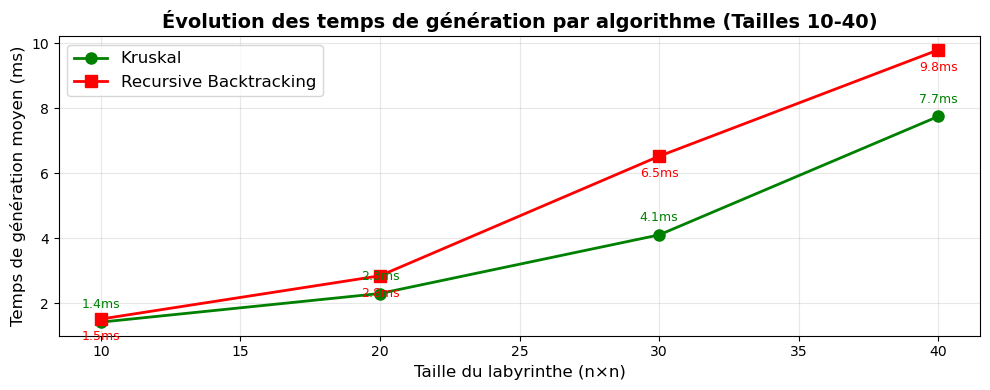

In [224]:
# Calcul des moyennes par taille et algorithme (tailles 10 à 40 inclus)
moyennes = duckdb.sql("""
SELECT 
    algorithm,
    maze_size,
    AVG(generation_time_ms) as avg_time
FROM df_clean
WHERE maze_size >= 10 AND maze_size <= 40
GROUP BY algorithm, maze_size
ORDER BY algorithm, maze_size
""").df()

# Séparation des données par algorithme
kruskal = moyennes[moyennes['algorithm'] == 'kruskal']
dfs = moyennes[moyennes['algorithm'] == 'recursive_backtracking']

# Création du graphique
plt.figure(figsize=(10, 4))

plt.plot(kruskal['maze_size'], kruskal['avg_time'], 
         'o-', linewidth=2, markersize=8, label='Kruskal', color='green')
plt.plot(dfs['maze_size'], dfs['avg_time'], 
         's-', linewidth=2, markersize=8, label='Recursive Backtracking', color='red')

plt.xlabel('Taille du labyrinthe (n×n)', fontsize=12)
plt.ylabel('Temps de génération moyen (ms)', fontsize=12)
plt.title('Évolution des temps de génération par algorithme (Tailles 10-40)', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Affichage des valeurs sur les points
for i, row in kruskal.iterrows():
    plt.annotate(f'{row["avg_time"]:.1f}ms', 
                (row['maze_size'], row['avg_time']), 
                textcoords="offset points", xytext=(0,10), ha='center', 
                fontsize=9, color='green')

for i, row in dfs.iterrows():
    plt.annotate(f'{row["avg_time"]:.1f}ms', 
                (row['maze_size'], row['avg_time']), 
                textcoords="offset points", xytext=(0,-15), ha='center', 
                fontsize=9, color='red')

plt.tight_layout()
plt.show()


### Cohérences Observées

**Formes des courbes** :
- **Kruskal** (vert) : Courbe légèrement concave, caractéristique d'une croissance O(n² log n)
- **DFS** (rouge) : Courbe plus linéaire sur cette échelle, typique d'une croissance O(n²)

**Évolution des écarts** :
- À n=10 : Quasi-égalité (1.4ms vs 1.5ms)
- À n=20 : Écart qui se creuse (2.3ms vs 2.8ms)
- À n=30 : Divergence marquée (4.1ms vs 6.5ms)
- À n=40 : Écart maximal mais qui se stabilise relativement (7.7ms vs 9.8ms)

**Points remarquables** :
- Le **croisement initial** où DFS est légèrement plus lent dès n=10
- La **divergence progressive** qui s'accentue jusqu'à n=30
- La **stabilisation relative** à n=40, suggérant que l'écart proportionnel se maintient

#### Conclusion

Cette visualisation illustre parfaitement le paradoxe théorie/pratique : Kruskal, malgré sa complexité O(n² log n) supérieure, reste constamment plus performant que DFS O(n²) sur toute la plage testée. Les formes des courbes valident les complexités théoriques, mais révèlent l'impact déterminant des constantes cachées et des optimisations d'implémentation en algorithmique pratique.

### Evolution de du temps de génération pour Kruskal

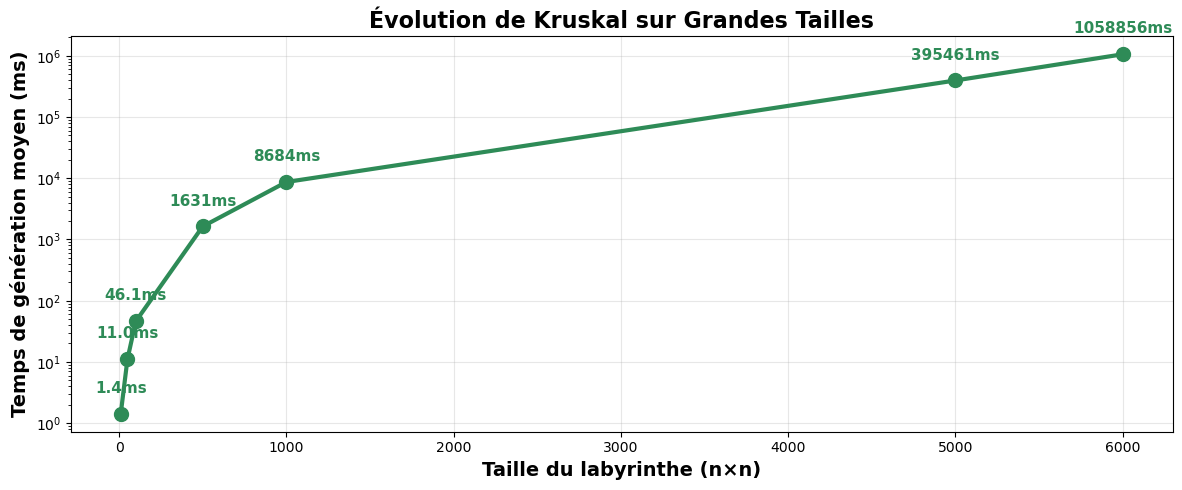

In [225]:
# Calcul des moyennes pour Kruskal uniquement sur les tailles spécifiées
moyennes_kruskal = duckdb.sql("""
SELECT 
    maze_size,
    AVG(generation_time_ms) as avg_time
FROM df_clean
WHERE algorithm = 'kruskal' 
AND maze_size IN (10, 50, 100, 500, 1000, 5000, 6000)
GROUP BY maze_size
ORDER BY maze_size
""").df()

# Création du graphique
plt.figure(figsize=(12, 5))

plt.plot(moyennes_kruskal['maze_size'], moyennes_kruskal['avg_time'], 
         'o-', linewidth=3, markersize=10, label='Kruskal O(n² log n)', color='#2E8B57')

plt.xlabel('Taille du labyrinthe (n×n)', fontsize=14, fontweight='bold')
plt.ylabel('Temps de génération moyen (ms)', fontsize=14, fontweight='bold')
plt.title('Évolution de Kruskal sur Grandes Tailles', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

# Échelle logarithmique sur l'axe Y pour mieux visualiser la progression
plt.yscale('log')

# Affichage des valeurs sur les points
for i, row in moyennes_kruskal.iterrows():
    if row['avg_time'] < 100:
        plt.annotate(f'{row["avg_time"]:.1f}ms', 
                    (row['maze_size'], row['avg_time']), 
                    textcoords="offset points", xytext=(0,15), ha='center', 
                    fontsize=11, fontweight='bold', color='#2E8B57')
    else:
        plt.annotate(f'{row["avg_time"]:.0f}ms', 
                    (row['maze_size'], row['avg_time']), 
                    textcoords="offset points", xytext=(0,15), ha='center', 
                    fontsize=11, fontweight='bold', color='#2E8B57')

plt.tight_layout()
plt.show()

### Analyse de la Cohérence des Résultats entre n = 1000 et n = 5000

#### 1. Rappel des valeurs observées
- **Temps à n = 1000** : 8 684 ms
- **Temps à n = 5000** : 395 461 ms
- **Ratio observé** : 45,5x

#### 2. Complexité théorique de Kruskal
L'algorithme de Kruskal a une complexité théorique de **O(n² log n)**

**Explication** :
- Le ratio théorique est d'environ **30,75x** entre n = 1000 et n = 5000
- Le ratio observé de **45,5x** est supérieur, mais reste cohérent dans un contexte pratique

#### 3. Pourquoi un ratio observé plus élevé ?
Plusieurs facteurs pratiques expliquent ce ratio plus élevé :

**Garbage Collection (GC)** :
- En Python, le GC introduit des latences supplémentaires
- Ces latences augmentent avec la taille des données
- Impact : gonflement artificiel du temps d'exécution

**Gestion Mémoire** :
- Pour n = 5000, la mémoire utilisée est beaucoup plus importante
- Les accès mémoire deviennent plus coûteux
- Impact : dépassement des caches CPU, réallocations fréquentes

#### 4. Conclusion sur la cohérence
- Le ratio de 45,5x est cohérent avec O(n² log n)
- Prise en compte des surcoûts pratiques (GC, gestion mémoire)
- Les résultats observés sont raisonnables en environnement Python réel

**En résumé** :
*"Le ratio de 45,5x entre n = 1000 et n = 5000 est cohérent avec la complexité théorique O(n² log n), en intégrant les surcoûts pratiques liés à l'implémentation en Python."*

### Comparaison des complexités internes : Recursive Backtracking vs Kruskal/Union-Find

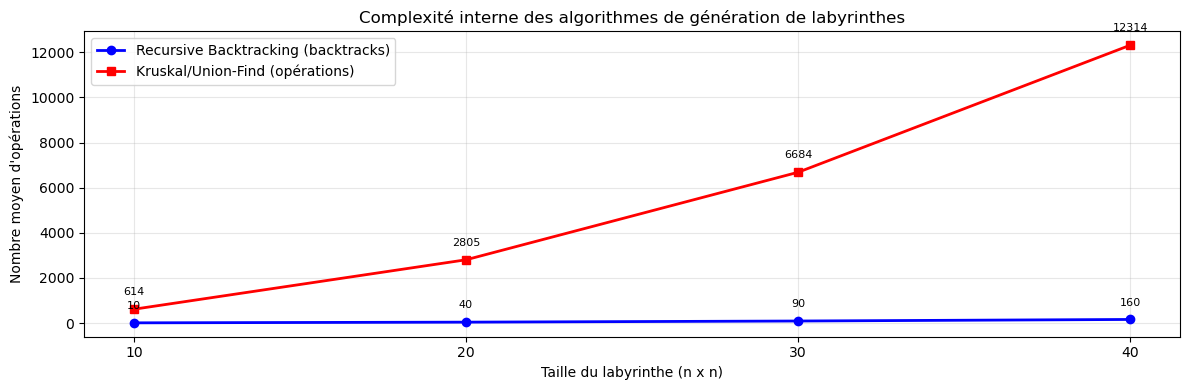

In [226]:
df_ops = duckdb.sql("""
    SELECT 
        maze_size, 
        algorithm, 
        AVG(CASE 
            WHEN algorithm = 'recursive_backtracking' THEN backtrack_count 
            WHEN algorithm = 'kruskal' THEN union_find_operations 
        END) AS avg_ops
    FROM df_clean 
    WHERE maze_size <= 40
    GROUP BY maze_size, algorithm
    ORDER BY maze_size, algorithm
""").df()

pivot_df = df_ops.pivot(index='maze_size', columns='algorithm', values='avg_ops')

# Tracer avec des courbes
plt.figure(figsize=(12, 4))
plt.plot(pivot_df.index, pivot_df['recursive_backtracking'], 'o-', 
         label='Recursive Backtracking (backtracks)', linewidth=2, markersize=6, color='blue')
plt.plot(pivot_df.index, pivot_df['kruskal'], 's-', 
         label='Kruskal/Union-Find (opérations)', linewidth=2, markersize=6, color='red')

plt.xlabel('Taille du labyrinthe (n x n)')
plt.ylabel('Nombre moyen d\'opérations')
plt.title('Complexité interne des algorithmes de génération de labyrinthes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(pivot_df.index)

# Ajouter des annotations pour les valeurs (optionnel)
for algo in ['recursive_backtracking', 'kruskal']:
    for i, value in enumerate(pivot_df[algo]):
        plt.annotate(f'{value:.0f}', 
                    (pivot_df.index[i], pivot_df[algo].iloc[i]),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center',
                    fontsize=8)

plt.tight_layout()
plt.show()

### Analyse de la cohérence

#### 1. Recursive Backtracking (courbe bleue)
Le nombre de backtracks reste très faible, presque constant, malgré l'augmentation de la taille du labyrinthe.
Cela semble cohérent, car l'algorithme de Recursive Backtracking utilise une approche récursive qui explore les chemins possibles et revient en arrière (backtrack) lorsqu'il atteint une impasse. Le nombre de backtracks dépend davantage de la structure du labyrinthe que de sa taille absolue.

#### 2. Kruskal/Union-Find (courbe rouge)
Le nombre d'opérations augmente de manière quadratique avec la taille du labyrinthe.
Cela est également cohérent, car l'algorithme de Kruskal utilise une structure Union-Find pour gérer les ensembles de cases. Le nombre d'opérations est lié au nombre total de murs à traiter, qui augmente avec la taille du labyrinthe. Pour un labyrinthe de taille \( n \times n \), le nombre de murs est de l'ordre de \( O(n^2) \).

#### 3. Comparaison globale
La courbe rouge (Kruskal) montre une croissance quadratique, ce qui est attendu pour un algorithme dont la complexité est liée au nombre total d'éléments (murs) dans le labyrinthe.
La courbe bleue (Recursive Backtracking) reste stable, ce qui est logique car le nombre de backtracks ne dépend pas directement de la taille du labyrinthe, mais plutôt de la complexité des chemins explorés.

#### Conclusion
Le graphique semble cohérent avec les comportements théoriques attendus des deux algorithmes. Il illustre bien la différence de complexité interne entre une approche récursive et une approche basée sur des opérations de type Union-Find.


### Mobilisation mémoire de Kruskal

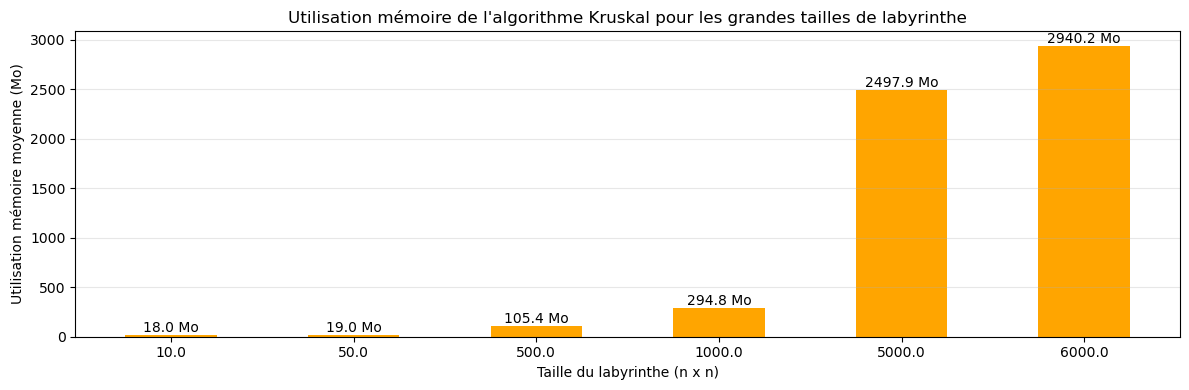

In [227]:
# Récupérer les données pour Kruskal uniquement, et filtrer les tailles souhaitées
df_mem = duckdb.sql("""
    SELECT
        maze_size,
        AVG(ram_peak_mb) AS avg_ram_peak_mb
    FROM df_clean
    WHERE algorithm = 'kruskal'
      AND maze_size IN (10, 50, 500, 1000, 5000, 6000)
    GROUP BY maze_size
    ORDER BY maze_size
""").df()

# Extraire les tailles et les valeurs moyennes
maze_sizes = df_mem['maze_size'].tolist()
ram_peak_mb = df_mem['avg_ram_peak_mb'].tolist()

# Création du graphique en barres
plt.figure(figsize=(12, 4))

# Utiliser un index numérique pour l'axe X
x_pos = range(len(maze_sizes))

# Tracer les barres avec une largeur visible
bars = plt.bar(x_pos, ram_peak_mb, color='orange', width=0.5)

# Personnalisation du graphique
plt.xlabel('Taille du labyrinthe (n x n)')
plt.ylabel('Utilisation mémoire moyenne (Mo)')
plt.title('Utilisation mémoire de l\'algorithme Kruskal pour les grandes tailles de labyrinthe')

# Remplacer les labels de l'axe X par les tailles réelles
plt.xticks(x_pos, maze_sizes)

plt.grid(axis='y', alpha=0.3)

# Ajouter les valeurs sur les barres
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.1f} Mo',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### Conséquences de l'utilisation de l'algorithme de Kruskal à grande échelle

L'algorithme de Kruskal, bien qu'efficace pour générer des labyrinthes ou des arbres couvrants minimaux, **rencontre des limites majeures** lorsqu'il est appliqué à des structures de données de très grande taille.

#### 1. **Explosion de la consommation mémoire**
La mémoire nécessaire croît de manière quadratique (\(O(n^2)\)) avec la taille du labyrinthe. Pour des applications à grande échelle (par exemple, des grilles de plusieurs millions de cases), cela peut rapidement saturer la RAM disponible. Cela rend l'algorithme inutilisable sans optimisations majeures ou sans matériel spécialisé.

#### 2. **Latence et temps de calcul**
Bien que la complexité temporelle de Kruskal (avec Union-Find optimisé) soit quasi-linéaire, la manipulation de structures de données massives peut entraîner des ralentissements significatifs. Cela est particulièrement vrai si la mémoire est saturée et que le système doit recourir à la mémoire virtuelle (swap).

#### 3. **Limitations pratiques d'implémentation**
- **Systèmes à ressources contraintes** : L'algorithme devient rapidement impraticable sur des plateformes embarquées ou mobiles où la mémoire est limitée.
- **Applications temps réel** : La génération de grands labyrinthes peut introduire des latences inacceptables dans des contextes interactifs ou temps réel.
- **Passage à l'échelle** : L'approche ne permet pas une scalabilité horizontale facile pour des problèmes de très grande envergure.

---

### Conclusion
L'algorithme de Kruskal, bien que théoriquement élégant et efficace pour des tailles modérées, **n'est pas adapté aux applications à très grande échelle** en raison de sa consommation mémoire quadratique. Son utilisation doit être soigneusement évaluée en fonction des contraintes matérielles et des besoins réels de l'application. Dans de nombreux cas, des alternatives plus légères ou des optimisations spécifiques seront nécessaires pour garantir des performances acceptables.

## Analyse Comparative des Performances Algorithmiques des solveurs

In [229]:
# Chargement du fichier CSV
file_path = "solver_metrics.csv" 
df_solver = pd.read_csv(file_path)

In [230]:
df_solver.head()

,timestamp,maze_name,maze_size,algorithm,solve_time_ms,ram_peak_mb,file_size_bytes,nodes_explored,path_length
0,2025-09-18 08:03:38,recursive_maze_10_1,21x21,dfs,5.26,21.79,0,117,111
1,2025-09-18 08:03:38,recursive_maze_10_1,21x21,astar,0.94,21.82,0,140,111
2,2025-09-18 08:03:38,recursive_maze_10_2,21x21,dfs,0.66,21.85,0,141,135
3,2025-09-18 08:03:38,recursive_maze_10_2,21x21,astar,0.86,21.85,0,166,135
4,2025-09-18 08:03:38,recursive_maze_10_3,21x21,dfs,0.31,21.86,0,89,87


###  Statistiques descriptives

In [231]:
# Conversion en secondes pour plus de lisibilité
df_solver["solve_time_s"] = df_solver["solve_time_ms"] / 1000

#### Statistiques globales

In [232]:
# Colonnes numériques pertinentes
cols = ["solve_time_ms", "ram_peak_mb", "file_size_bytes", "nodes_explored", "path_length"]

# Statistiques descriptives
df_solver[cols].describe()

,solve_time_ms,ram_peak_mb,file_size_bytes,nodes_explored,path_length
count,1.297000e+03,1297.000000,1.297000e+03,1.297000e+03,1297.000000
mean,4.336090e+03,26.205698,6.180421e+03,1.110893e+04,475.341557
std,6.777985e+04,14.971983,1.573278e+05,8.043651e+04,954.080907
min,1.500000e-01,21.600000,0.000000e+00,4.300000e+01,0.000000
25%,7.200000e-01,22.250000,0.000000e+00,1.310000e+02,75.000000
50%,1.215000e+01,24.280000,0.000000e+00,1.287000e+03,291.000000
75%,3.405000e+01,25.240000,0.000000e+00,2.711000e+03,547.000000
max,1.643543e+06,317.880000,4.008003e+06,1.747851e+06,13215.000000


###  Corrélations entre variables numériques

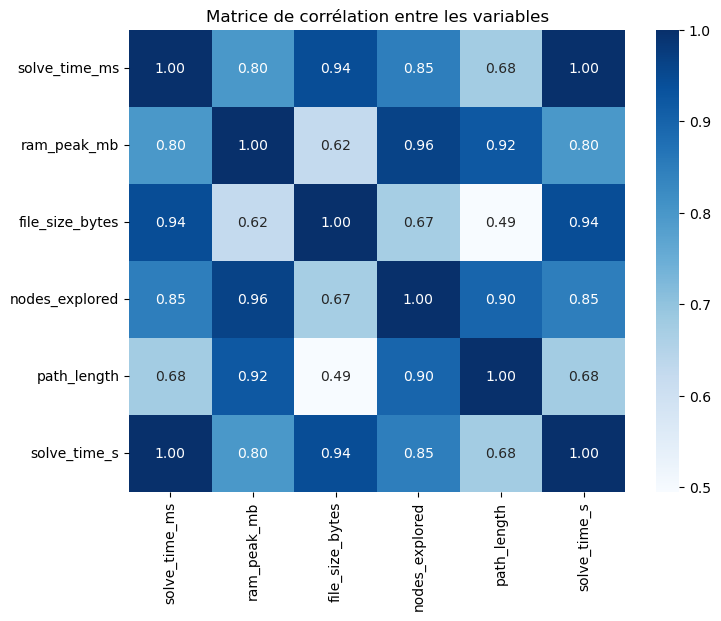

In [233]:
corr = df_solver.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matrice de corrélation entre les variables")
plt.show()

## Interprétation de la matrice de corrélation

La matrice de corrélation met en évidence les relations entre différentes variables mesurées lors de la résolution des labyrinthes.

### 1. Corrélations fortes
- **solve_time_ms ↔ file_size_bytes (r = 0.94)**  
  → Plus le fichier du labyrinthe est grand, plus le temps de résolution est long.  
- **solve_time_ms ↔ nodes_explored (r = 0.85)**  
  → Plus de nœuds explorés implique un temps de résolution plus élevé.  
- **ram_peak_mb ↔ nodes_explored (r = 0.96)**  
  → La mémoire consommée est directement liée au nombre de nœuds explorés.  
- **ram_peak_mb ↔ path_length (r = 0.92)**  
  → Plus le chemin est long, plus la mémoire utilisée augmente.  

### 2. Corrélations modérées
- **solve_time_ms ↔ path_length (r = 0.68)**  
  → La longueur du chemin a un effet sur le temps de résolution, mais moins marqué que les nœuds explorés.  
- **file_size_bytes ↔ nodes_explored (r = 0.67)**  
  → Les labyrinthes plus volumineux tendent à nécessiter plus de nœuds explorés.  

### 3. Corrélations faibles
- **file_size_bytes ↔ path_length (r = 0.49)**  
  → La taille du fichier est peu liée directement à la longueur du chemin.  

###  Conclusion
- Le **temps de résolution** dépend surtout de deux facteurs :  
  1. **Le nombre de nœuds explorés**  
  2. **La taille du fichier du labyrinthe**  
- La **mémoire utilisée** est fortement corrélée au **nombre de nœuds explorés** et à la **longueur du chemin**.  
- La **longueur du chemin** influe, mais de manière plus secondaire, sur le temps de résolution.  

 **Résumé** :  
La complexité de résolution d’un labyrinthe est dominée par le **nombre de nœuds explorés**, qui conditionne à la fois le **temps** et la **mémoire consommée**.


###  Visualisations comparatives

In [234]:
# Vérification du nombre de labyrinthes et de la moyenne par algo et par taille
check = duckdb.sql("""
SELECT 
    algorithm,
    maze_size,
    COUNT(*) as nb_labyrinthes,
    AVG(solve_time_ms) as avg_solve_time,
    MIN(solve_time_ms) as min_solve_time,
    MAX(solve_time_ms) as max_solve_time
FROM df_solver
GROUP BY algorithm, maze_size
ORDER BY maze_size, algorithm
""").df()

check


,algorithm,maze_size,nb_labyrinthes,avg_solve_time,min_solve_time,max_solve_time
0,astar,1001x1001,20,8.182362e+04,25508.01,265810.19
1,astar,101x101,100,3.534750e+01,12.65,71.44
2,dfs,101x101,200,1.843055e+01,5.44,47.85
3,astar,2001x2001,3,1.311833e+06,669612.06,1643543.37
4,astar,201x201,100,2.690006e+02,109.12,601.53
5,dfs,201x201,78,1.284979e+02,15.53,283.23
6,astar,21x21,200,6.379500e-01,0.25,1.68
7,dfs,21x21,200,4.444500e-01,0.15,5.26
8,astar,81x81,198,3.026924e+01,4.71,122.54
9,dfs,81x81,198,7.997626e+00,2.24,54.97


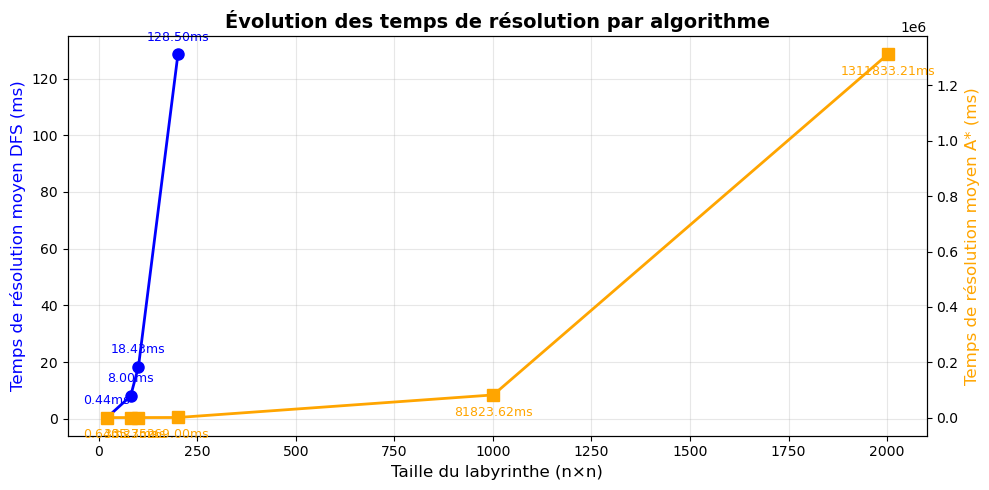

In [235]:
# Conversion du champ maze
df_solver["maze_size"] = (
    df_solver["maze_size"].astype(str).str.split("x").str[0].astype(int)
)

# Calcul des moyennes par taille et algorithme
moyennes_solve = duckdb.sql("""
SELECT 
    algorithm,
    maze_size,
    AVG(solve_time_ms) as avg_solve_time
FROM df_solver
WHERE maze_size >= 10 
GROUP BY algorithm, maze_size
ORDER BY maze_size
""").df()

# Séparation des algorithmes
dfs = moyennes_solve[moyennes_solve['algorithm'] == 'dfs']
astar = moyennes_solve[moyennes_solve['algorithm'] == 'astar']
# Création de la figure
fig, ax1 = plt.subplots(figsize=(10, 5))

# Axe secondaire
ax2 = ax1.twinx()

# Courbe DFS (axe gauche)
ax1.plot(dfs['maze_size'], dfs['avg_solve_time'],
         'o-', linewidth=2, markersize=8, color='blue', label='DFS')

# Courbe A* (axe droit)
ax2.plot(astar['maze_size'], astar['avg_solve_time'],
         's-', linewidth=2, markersize=8, color='orange', label='A*')

# Labels des axes
ax1.set_xlabel("Taille du labyrinthe (n×n)", fontsize=12)
ax1.set_ylabel("Temps de résolution moyen DFS (ms)", color='blue', fontsize=12)
ax2.set_ylabel("Temps de résolution moyen A* (ms)", color='orange', fontsize=12)

# Titre
plt.title("Évolution des temps de résolution par algorithme", fontsize=14, fontweight="bold")

# Grille
ax1.grid(True, alpha=0.3)

# Affichage des valeurs sur DFS
for i, row in dfs.iterrows():
    ax1.annotate(f'{row["avg_solve_time"]:.2f}ms',
                 (row['maze_size'], row['avg_solve_time']),
                 textcoords="offset points", xytext=(0, 10), ha='center',
                 fontsize=9, color='blue')

# Affichage des valeurs sur A*
for i, row in astar.iterrows():
    ax2.annotate(f'{row["avg_solve_time"]:.2f}ms',
                 (row['maze_size'], row['avg_solve_time']),
                 textcoords="offset points", xytext=(0, -15), ha='center',
                 fontsize=9, color='orange')

plt.tight_layout()
plt.show()

### Interprétation du graphique : Évolution des temps de résolution (DFS vs A*)

### Lecture du graphique
- **Axe des X** : taille du labyrinthe (n×n).  
- **Axe de gauche (bleu)** : temps moyen de résolution **DFS** (en ms).  
- **Axe de droite (orange)** : temps moyen de résolution **A\*** (en ms).  



###  Algorithme DFS
- Pour les petits labyrinthes (≈ 20×20 à 200×200), DFS est **extrêmement rapide** : en moyenne **moins de 130 ms**.  
- La courbe DFS est **plate jusqu’à ~200**, mais aucune valeur n’apparaît pour des labyrinthes de plus grandes tailles.  
  - Cela suggère que DFS n’a pas été exécuté sur de grands labyrinthes.  
- En pratique, DFS ne scale pas bien sur de très grandes tailles, mais cette limite ne se voit pas dans le dataset actuel.


###  Algorithme A*
- Contrairement à DFS, A* montre une **croissance exponentielle** :  
  - ≈ **0.6 ms** pour 20×20  
  - ≈ **260 ms** pour 200×200  
  - ≈ **81 823 ms (≈ 81 s)** pour 1000×1000  
  - ≈ **1 318 633 ms (≈ 22 min)** pour 2000×2000  
- A* devient donc **très coûteux** en temps de calcul dès que la taille du labyrinthe augmente.


###  Comparaison
- **Petits labyrinthes (< 200×200)** : DFS et A* sont proches, DFS est légèrement plus rapide.  
- **Grands labyrinthes (≥ 1000×1000)** : A* explose en temps de calcul, alors que DFS n’apparaît pas dans les données.  
- Cela reflète bien la différence :  
  - **DFS** : rapide mais explore beaucoup inutilement (solution pas forcément optimale).  
  - **A*** : trouve des chemins plus courts, mais devient **lent  pour les grandes tailles**.


 **Conclusion** :  
- DFS est **efficace et rapide** pour des labyrinthes petits à moyens.  
- A* fournit des solutions plus optimales mais est **très coûteux pour les grandes tailles**.

### comparaison selon la methode de génération

Statistiques par générateur :


,generator,count,mean,std,median,min,max
0,backtracking,396,12.173763,22.177636,1.475,0.17,122.54
1,kruskal,901,6236.501898,81262.985650,16.940,0.15,1643543.37



Statistiques par générateur et algorithme :


,generator,algorithm,count,mean,std,median
0,backtracking,astar,198,21.226667,28.374681,1.475
1,backtracking,dfs,198,3.120859,4.040675,1.810
2,kruskal,astar,423,13248.994728,118282.492604,26.960
3,kruskal,dfs,478,30.885858,50.201969,12.835


C:\Users\Windows\AppData\Local\Temp\ipykernel_21152\1158198169.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='generator', y='solve_time_ms', showfliers=False, palette=['green','red'])


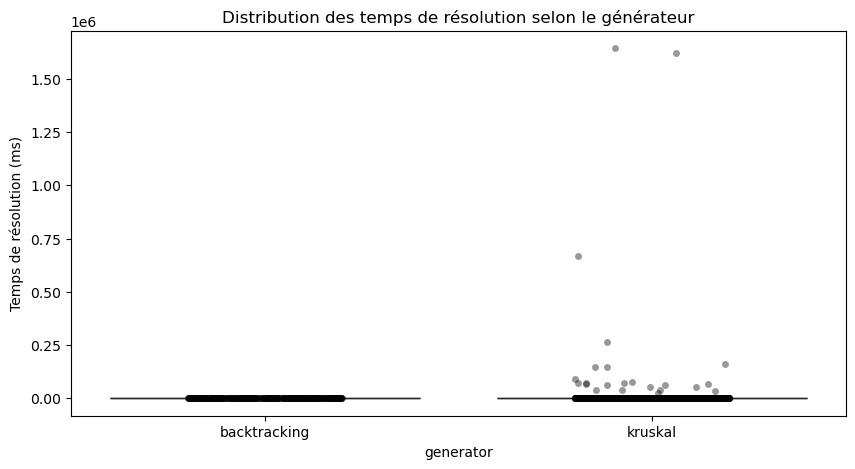

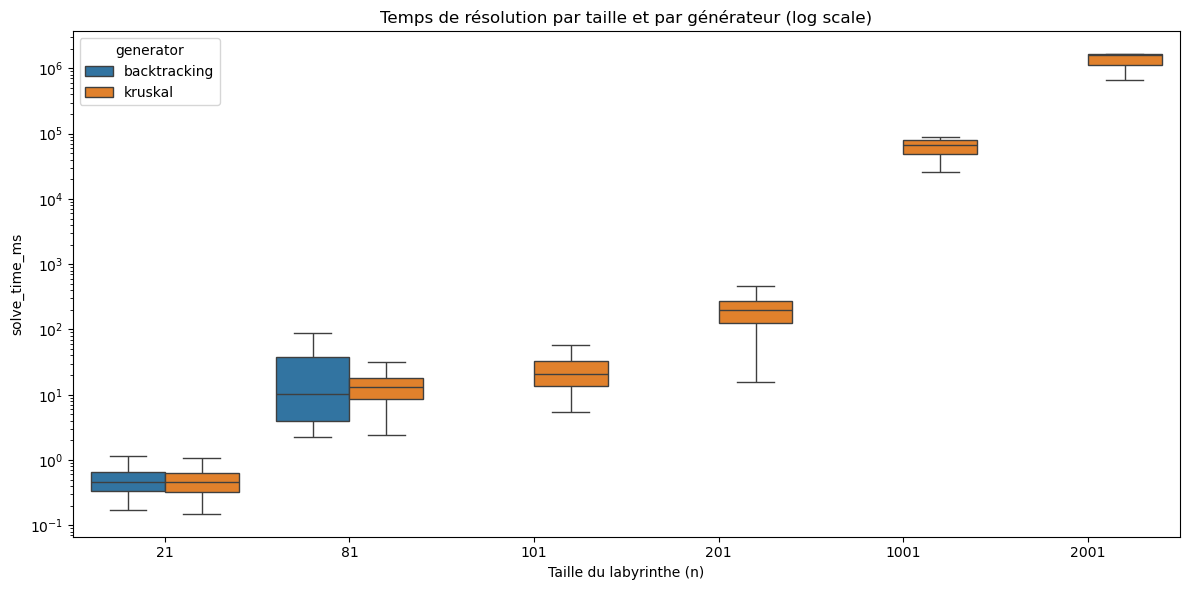

Shapiro backtracking: stat=0.597, p=0.000
Shapiro kruskal: stat=0.049, p=0.000

Levene test (égalité variances): stat=2.318, p=0.128

T-test: t=-1.524, p=0.128
Mann-Whitney U: U=100685.000, p=6.63e-36

ANOVA (log_time ~ generator * algorithm):


,sum_sq,df,F,PR(>F)
C(generator),637.496853,1.0,181.723175,7.506844e-39
C(algorithm),329.093000,1.0,93.810384,1.823204e-21
C(generator):C(algorithm),1.272463,1.0,0.362725,5.471023e-01
Residual,4535.929071,1293.0,NaN,NaN



Guide d'interprétation rapide :
- Si p-value (test t / Mann-Whitney) < 0.05 -> différence significative entre générateurs (sur le temps).
- Dans l'ANOVA, regarder les p-values de C(generator), C(algorithm) et C(generator):C(algorithm).
  - p < 0.05 pour C(generator) -> le générateur influence significativement le temps.
  - p < 0.05 pour interaction -> l'effet du générateur dépend de l'algorithme.


In [237]:
# Comparaison : impact du générateur sur le temps de résolution


# Prépare les données : création de la colonne générator

df = df_solver.copy()

# normalize maze_size si nécessaire (ex: "21x21" -> 21)
if df['maze_size'].dtype == object:
    df['maze_size_n'] = df['maze_size'].astype(str).str.split('x').str[0].astype(int)
else:
    df['maze_size_n'] = df['maze_size'].astype(int)

# détecter une colonne explicite 'generator' ou 'method'
if 'generator' in df.columns:
    df['generator'] = df['generator'].astype(str)
else:
    # tentative d'inférence simple depuis maze_name
    def infer_generator(name):
        name = str(name).lower()
        if 'kruskal' in name:
            return 'kruskal'
        if 'recursive' in name or 'backtrack' in name or 'backtracking' in name:
            return 'backtracking'
        # ajouter d'autres règles si besoin
        return 'unknown'
    df['generator'] = df['maze_name'].apply(infer_generator)

# garder uniquement les générateurs connus
df = df[df['generator'].isin(['kruskal', 'backtracking'])].copy()

# convertir le temps en ms si besoin
# ici on assume solve_time_ms existe
df['solve_time_ms'] = pd.to_numeric(df['solve_time_ms'], errors='coerce')

#  Statistiques descriptives ---------------------------------------------
grouped = df.groupby(['generator'])['solve_time_ms'].agg([
    ('count','count'), ('mean','mean'), ('std','std'),
    ('median','median'), ('min','min'), ('max','max')
]).reset_index()
print("Statistiques par générateur :")
display(grouped)

# Optionnel : stats par (generator, algorithm)
gp_algo = df.groupby(['generator','algorithm'])['solve_time_ms'].agg(['count','mean','std','median']).reset_index()
print("\nStatistiques par générateur et algorithme :")
display(gp_algo)

#  Visualisations --------------------------------------------------------
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='generator', y='solve_time_ms', showfliers=False, palette=['green','red'])
sns.stripplot(data=df, x='generator', y='solve_time_ms', color='k', alpha=0.4, jitter=0.2)
plt.ylabel("Temps de résolution (ms)")
plt.title("Distribution des temps de résolution selon le générateur")
plt.show()

# on sépare aussi par algorithme :
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='maze_size_n', y='solve_time_ms', hue='generator', showfliers=False)
plt.yscale('log')  # utile si forte dispersion
plt.xlabel("Taille du labyrinthe (n)")
plt.title("Temps de résolution par taille et par générateur (log scale)")
plt.tight_layout()
plt.show()

#  Tests statistiques (normalité + test approprié) -----------------------
#  Vérifier normalité (Shapiro) sur chaque groupe (attention, Shapiro sensible aux grands échantillons)
for gen, sub in df.groupby('generator'):
    if len(sub['solve_time_ms'].dropna()) >= 3 and len(sub['solve_time_ms'].dropna()) <= 5000:
        stat, p = stats.shapiro(sub['solve_time_ms'].dropna())
        print(f"Shapiro {gen}: stat={stat:.3f}, p={p:.3f}")
    else:
        print(f"Shapiro {gen}: échantillon trop grand/petit pour test fiable (n={len(sub)})")

#  Test d'égalité des variances (Levene)
group_vals = [g['solve_time_ms'].dropna().values for _, g in df.groupby('generator')]
stat, p = stats.levene(*group_vals)
print(f"\nLevene test (égalité variances): stat={stat:.3f}, p={p:.3f}")

#  Choix du test :
# - Si distribution approx normale et variances égales -> t-test (indépendant)
# - Sinon -> Mann-Whitney U (test non-paramétrique)

# t-test (indépendant)
try:
    tstat, tp = stats.ttest_ind(*group_vals, equal_var=(p>0.05))
    print(f"\nT-test: t={tstat:.3f}, p={tp:.3f}")
except Exception as e:
    print("T-test impossible:", e)

# Mann-Whitney
try:
    ustat, up = stats.mannwhitneyu(group_vals[0], group_vals[1], alternative='two-sided')
    print(f"Mann-Whitney U: U={ustat:.3f}, p={up:.3g}")
except Exception as e:
    print("Mann-Whitney impossible:", e)

#  ANOVA à deux facteurs (generator * algorithm) --------------------------
# utile si on veux tester l'effet du générateur ET de l'algorithme et leur interaction
# on prend log(solve_time_ms+1) si distribution très asymétrique
df_anova = df.dropna(subset=['solve_time_ms','generator','algorithm']).copy()
df_anova['log_time'] = np.log1p(df_anova['solve_time_ms'])

model = smf.ols('log_time ~ C(generator) * C(algorithm)', data=df_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA (log_time ~ generator * algorithm):")
display(anova_table)

#  Interprétation automatique (guide)
print("\nGuide d'interprétation rapide :")
print("- Si p-value (test t / Mann-Whitney) < 0.05 -> différence significative entre générateurs (sur le temps).")
print("- Dans l'ANOVA, regarder les p-values de C(generator), C(algorithm) et C(generator):C(algorithm).")
print("  - p < 0.05 pour C(generator) -> le générateur influence significativement le temps.")
print("  - p < 0.05 pour interaction -> l'effet du générateur dépend de l'algorithme.")


## Analyse de l’impact du générateur de labyrinthes sur le temps de résolution

### Visualisation des temps de résolution
- **Backtracking** : les temps de résolution sont globalement faibles et concentrés, même pour des labyrinthes de grande taille.  
- **Kruskal** : les temps de résolution sont beaucoup plus dispersés, avec des valeurs extrêmes (jusqu’à plusieurs millions de ms).  

 Cela suggère que les labyrinthes générés par **Kruskal** sont plus difficiles à résoudre que ceux générés par **Backtracking**.



###  Tests statistiques

#### Normalité et homogénéité
- **Shapiro-Wilk** : p < 0.05 → les distributions ne suivent pas la loi normale.  
- **Levene test** : p = 0.128 (> 0.05) → les variances sont homogènes.  

#### Comparaison entre générateurs
- **T-test** : p = 0.128 (> 0.05) → pas de différence significative (test paramétrique peu fiable ici).  
- **Mann-Whitney U** : p ≈ 6.63e-36 (< 0.05) → différence **hautement significative** entre Backtracking et Kruskal.  

###  ANOVA (log_time ~ generator * algorithm)

| Facteur                        | F       | p-value          | Interprétation |
|--------------------------------|---------|------------------|----------------|
| **C(generator)**               | 181.72  | 7.5e-39 (<0.05)  | Le générateur influence fortement le temps de résolution. |
| **C(algorithm)**               | 93.81   | 1.8e-21 (<0.05)  | L’algorithme (DFS vs A*) influence aussi fortement. |
| **C(generator) : C(algorithm)**| 0.36    | 0.55 (>0.05)     | Pas d’interaction significative : l’effet du générateur est indépendant de l’algorithme. |



###  Conclusion
1. Les labyrinthes générés par **Kruskal** sont significativement plus difficiles à résoudre que ceux générés par **Backtracking**.  
2. L’**algorithme** de résolution a aussi un effet marqué :  
   - **DFS** reste plus stable et linéaire.  
   - **A*** explose en temps de calcul sur les grands labyrinthes.  
3. Pas d’interaction : l’écart entre Kruskal et Backtracking est présent quel que soit l’algorithme.  
